## Basic Libraries

In [1]:
import pandas as pd
import numpy as np

## Libraries for Image 

In [2]:
import cv2
from PIL import Image

base_url = './data/cifake'

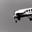

In [3]:
Image.open(base_url+'/train/FAKE/5999.jpg')


In [4]:
image = cv2.imread(base_url + '/train/FAKE/5999.jpg')
image.shape

(32, 32, 3)

## **TRAIN DATAFRAME**

## Creating Training Dataframe for **"Fake Image"**

In [5]:
train_path_fake =[]

base_train_fake = base_url+'/train/FAKE/'

for i in range(1000,6000):
    a = '{}{}.jpg'.format(base_train_fake, i)
    train_path_fake.append(a)

for i in range(1000,6000):
    for j in range(2,11):
        b = '{}{} ({}).jpg'.format(base_train_fake, i, j)
        train_path_fake.append(b)
len(train_path_fake)


50000

In [6]:
df_train_fake = pd.DataFrame(train_path_fake)
df_train_fake.columns = ['path']
df_train_fake['label'] = 0
df_train_fake.head()

,path,label
0,./data/cifake/train/FAKE/1000.jpg,0
1,./data/cifake/train/FAKE/1001.jpg,0
2,./data/cifake/train/FAKE/1002.jpg,0
3,./data/cifake/train/FAKE/1003.jpg,0
4,./data/cifake/train/FAKE/1004.jpg,0


## Creating Training Dataframe for **"Real Image"**

In [7]:
train_path_real=[]

base__train_real = base_url+'/train/REAL/'

for i in range(0,10):
    c = '{}000{}.jpg'.format(base__train_real, i)
    train_path_real.append(c)

for i in range(0,10):
    for j in range(2,11):
        d = '{}000{} ({}).jpg'.format(base__train_real, i,j)
        train_path_real.append(d)
len(train_path_real)

100

In [8]:
for i in range(10,100):
    e = '{}00{}.jpg'.format(base__train_real, i)
    train_path_real.append(e)


for i in range(10,100):
    for j in range(2,11):
        f = '{}00{} ({}).jpg'.format(base__train_real, i,j)
        train_path_real.append(f)
len(train_path_real)

1000

In [9]:
for i in range(100,1000):
    g = '{}0{}.jpg'.format(base__train_real, i)
    train_path_real.append(g)

for i in range(100,1000):
    for j in range(2,11):
        h = '{}0{} ({}).jpg'.format(base__train_real, i,j)
        train_path_real.append(h)
len(train_path_real)

10000

In [10]:

for i in range(1000,5000):
    k = '{}{}.jpg'.format(base__train_real, i)
    train_path_real.append(k)

for i in range(1000,5000):
    for j in range(2,11):
        l = '{}{} ({}).jpg'.format(base__train_real, i,j)
        train_path_real.append(l)
len(train_path_real)


50000

In [11]:
df_train_real = pd.DataFrame(train_path_real)
df_train_real.columns = ['path']
df_train_real['label'] = 1
df_train_real.head()

,path,label
0,./data/cifake/train/REAL/0000.jpg,1
1,./data/cifake/train/REAL/0001.jpg,1
2,./data/cifake/train/REAL/0002.jpg,1
3,./data/cifake/train/REAL/0003.jpg,1
4,./data/cifake/train/REAL/0004.jpg,1


## Using **"concat"** to create  **"df_train"**

In [12]:
df_train = pd.concat((df_train_fake, df_train_real), axis = 0 )
print(df_train.shape)
df_train.sample(5)


(100000, 2)


,path,label
16982,./data/cifake/train/FAKE/2331 (5).jpg,0
45563,./data/cifake/train/REAL/4507 (2).jpg,1
34066,./data/cifake/train/FAKE/4229 (7).jpg,0
892,./data/cifake/train/FAKE/1892.jpg,0
5624,./data/cifake/train/FAKE/1069 (5).jpg,0


## Using **'cv2'** for X_train 

In [13]:
image_df = []
for image in df_train['path']:
    img = cv2.imread(image)
    resized = cv2.resize(img,(32,32))
    image_df.append(resized)
image_array = np.array(image_df)
X_train = image_array/255
X_train.ndim

4

In [14]:
np.save('./processed-data/X_train.npy', X_train)

Loading time ~1.5 min

In [15]:
y_train = df_train['label']
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [16]:
np.save('./processed-data/y_train.npy', y_train)

## **TEST DATAFRAME**

## Creating Testing Dataframe for **"Fake Image"**

In [17]:
test_path_fake =[]

base_test_fake = base_url+'/test/FAKE/'

for i in range(0,1000):
    m = '{}{}.jpg'.format(base_test_fake, i)
    test_path_fake.append(m)
    
for i in range(0,1000):
    for j in range(2,11):
        n = '{}{} ({}).jpg'.format(base_test_fake, i, j)
        test_path_fake.append(n)
len(test_path_fake)


10000

In [18]:
df_test_fake = pd.DataFrame(test_path_fake)
df_test_fake.columns = ['path']
df_test_fake['label'] = 0
df_test_fake.head()

,path,label
0,./data/cifake/test/FAKE/0.jpg,0
1,./data/cifake/test/FAKE/1.jpg,0
2,./data/cifake/test/FAKE/2.jpg,0
3,./data/cifake/test/FAKE/3.jpg,0
4,./data/cifake/test/FAKE/4.jpg,0


## Creating Testing Dataframe for **"Real Image"**

In [19]:
test_path_real =[]

base_test_real = base_url+'/test/REAL/'

for i in range(0,10):
    o = '{}000{}.jpg'.format(base_test_real, i)
    test_path_real.append(o)

for i in range(0,10):
    for j in range(2,11):
        p = '{}000{} ({}).jpg'.format(base_test_real, i,j)
        test_path_real.append(p)
len(test_path_real)


100

In [20]:
for i in range(10,100):
    q = '{}00{}.jpg'.format(base_test_real, i)
    test_path_real.append(q)

for i in range(10,100):
    for j in range(2,11):
        r = '{}00{} ({}).jpg'.format(base_test_real, i,j)
        test_path_real.append(r)
len(test_path_real) 


1000

In [21]:
for i in range(100,1000):
    s = '{}0{}.jpg'.format(base_test_real, i)
    test_path_real.append(s)
    
for i in range(100,1000):
    for j in range(2,11):
        t = '{}0{} ({}).jpg'.format(base_test_real, i,j)
        test_path_real.append(t)
len(test_path_real)

10000

In [22]:
df_test_real = pd.DataFrame(test_path_real)
df_test_real.columns = ['path']
df_test_real['label'] = 1
df_test_real.head()

,path,label
0,./data/cifake/test/REAL/0000.jpg,1
1,./data/cifake/test/REAL/0001.jpg,1
2,./data/cifake/test/REAL/0002.jpg,1
3,./data/cifake/test/REAL/0003.jpg,1
4,./data/cifake/test/REAL/0004.jpg,1


## Using **"concat"** to create  **"df_test"**

In [23]:
df_test = pd.concat((df_test_fake, df_test_real), axis = 0 )
print(df_test.shape)
df_test.sample(5)


(20000, 2)


,path,label
8061,./data/cifake/test/REAL/0784 (7).jpg,1
1876,./data/cifake/test/FAKE/97 (5).jpg,0
9445,./data/cifake/test/FAKE/938 (5).jpg,0
8294,./data/cifake/test/FAKE/810 (6).jpg,0
4531,./data/cifake/test/FAKE/392 (5).jpg,0


## Using **"cv2"** to create X_test

In [24]:
image_ds = []
for image in df_test['path']:
    imge = cv2.imread(image)
    resize = cv2.resize(imge,(32,32))
    image_ds.append(resize)
image_arry = np.array(image_ds)
X_test = image_arry/255
X_test.ndim

4

In [25]:
np.save('./processed-data/X_test.npy', X_test)

In [26]:
y_test = df_test['label']
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [27]:
np.save('./processed-data/y_test.npy', y_test)